411352246 簡郁芳
411352416 鍾宜庭
411352090 賴品吟
411352521 陳亭臻

1.請將「imdb_top_1000.xlsx」檔案存到你的Google雲端硬碟中，並分享檔案權限的方式讀取檔案中『Data』工作表中的資料，並命名為imdb1000資料集。

In [1]:
import pandas as pd

In [2]:
df_Share=pd.read_excel("https://drive.google.com/uc?id=1Nz1tOAxMeBpWk4EV58U0taDW6L2t-yKF&export=download",header=0)
print(df_Share)
df_imdb1000資料集=pd.read_excel("https://drive.google.com/uc?id=1Nz1tOAxMeBpWk4EV58U0taDW6L2t-yKF&export=download",sheet_name="Data")

                 Series_Title  Released_Year Certificate  Runtime  \
0    The Shawshank Redemption           1994           A      142   
1               The Godfather           1972           A      175   
2             The Dark Knight           2008          UA      152   
3      The Godfather: Part II           1974           A      202   
4                12 Angry Men           1957           U       96   
..                        ...            ...         ...      ...   
995    Breakfast at Tiffany's           1961           A      115   
996                     Giant           1956           G      201   
997     From Here to Eternity           1953      Passed      118   
998                  Lifeboat           1944         NaN       97   
999              The 39 Steps           1935         NaN       86   

     IMDB_Rating  Meta_score  No_of_Votes        Gross  
0            9.3        80.0      2343110   28,341,469  
1            9.2       100.0      1620367  134,966,411  


2.請將imdb1000中欄位名稱為「Series_Title」改成「電影片名」；「Runtime」改為「影片長度」並重新存回imdb1000

In [3]:
df_imdb1000資料集 = df_imdb1000資料集.rename(columns={"Series_Title": "電影片名", "Runtime": "影片長度"})
df_imdb1000資料集.to_csv("imdb_top_1000.csv")
print(df_imdb1000資料集)

                         電影片名  Released_Year Certificate  影片長度  IMDB_Rating  \
0    The Shawshank Redemption           1994           A   142          9.3   
1               The Godfather           1972           A   175          9.2   
2             The Dark Knight           2008          UA   152          9.0   
3      The Godfather: Part II           1974           A   202          9.0   
4                12 Angry Men           1957           U    96          9.0   
..                        ...            ...         ...   ...          ...   
995    Breakfast at Tiffany's           1961           A   115          7.6   
996                     Giant           1956           G   201          7.6   
997     From Here to Eternity           1953      Passed   118          7.6   
998                  Lifeboat           1944         NaN    97          7.6   
999              The 39 Steps           1935         NaN    86          7.6   

     Meta_score  No_of_Votes        Gross  
0      

3.請用info指令檢視資料集中變數是否符合「imdb_top_1000.xlsx」檔案中『變數定義』所認定之定義；若不是，請將該變數轉型成適當的資料型別。

In [4]:
df_imdb1000資料集.info()
df_imdb1000資料集["Gross"]=pd.to_numeric(df_imdb1000資料集["Gross"].str.replace(",",""),errors="coerce")
df_imdb1000資料集.to_csv("imdb_top_1000.csv")
df_imdb1000資料集.info()
print(df_imdb1000資料集)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   電影片名           1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Certificate    899 non-null    object 
 3   影片長度           1000 non-null   int64  
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     843 non-null    float64
 6   No_of_Votes    1000 non-null   int64  
 7   Gross          831 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   電影片名           1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Certificate    899 non-null    object 
 3   影片長度           1000 non-null   int64  
 4   IMDB_Rating    100

4.請將imdb1000中有遺失值的列刪除，另存成imdb_drop。

In [5]:
df_imdb1000資料集.isnull().sum()
print(df_imdb1000資料集.isnull().sum())
df_imdb1000資料集['Certificate'].dropna()
df_imdb1000資料集['Meta_score'].dropna()
df_imdb1000資料集['Gross'].dropna
print(df_imdb1000資料集.head())
df_imdb1000資料集.to_csv("imdb_drop.csv")
imdb_drop=df_imdb1000資料集

電影片名               0
Released_Year      0
Certificate      101
影片長度               0
IMDB_Rating        0
Meta_score       157
No_of_Votes        0
Gross            169
dtype: int64
                       電影片名  Released_Year Certificate  影片長度  IMDB_Rating  \
0  The Shawshank Redemption           1994           A   142          9.3   
1             The Godfather           1972           A   175          9.2   
2           The Dark Knight           2008          UA   152          9.0   
3    The Godfather: Part II           1974           A   202          9.0   
4              12 Angry Men           1957           U    96          9.0   

   Meta_score  No_of_Votes        Gross  
0        80.0      2343110   28341469.0  
1       100.0      1620367  134966411.0  
2        84.0      2303232  534858444.0  
3        90.0      1129952   57300000.0  
4        96.0       689845    4360000.0  


5.請用「if…elif…elif…else…判斷式」將imdb_drop中「IMDB_Rating」重新定義一個變數為『評等』存回imdb_drop這個資料集內，變數定義如下：
A   >= 9.0
B   < 9.0 and >= 8.5
C   <8.5 and >= 8.0
D   <8.0

In [6]:
for index, rating in imdb_drop["IMDB_Rating"].items():
    if rating >= 9.0:
        imdb_drop.loc[index, '評等'] = 'A'
    elif rating >= 8.5:
        imdb_drop.loc[index, '評等'] = 'B'
    elif rating >= 8.0:
        imdb_drop.loc[index, '評等'] = 'C'
    else:
        imdb_drop.loc[index,'評等'] = 'D'
print(imdb_drop)
imdb_drop.to_csv("imdb_drop.csv")

                         電影片名  Released_Year Certificate  影片長度  IMDB_Rating  \
0    The Shawshank Redemption           1994           A   142          9.3   
1               The Godfather           1972           A   175          9.2   
2             The Dark Knight           2008          UA   152          9.0   
3      The Godfather: Part II           1974           A   202          9.0   
4                12 Angry Men           1957           U    96          9.0   
..                        ...            ...         ...   ...          ...   
995    Breakfast at Tiffany's           1961           A   115          7.6   
996                     Giant           1956           G   201          7.6   
997     From Here to Eternity           1953      Passed   118          7.6   
998                  Lifeboat           1944         NaN    97          7.6   
999              The 39 Steps           1935         NaN    86          7.6   

     Meta_score  No_of_Votes        Gross 評等  
0   

6.請將imdb_drop中的「電影片名」定義成index並重新存回imdb_drop (5%)。

In [7]:
imdb_drop.set_index("電影片名")
imdb_drop.to_csv("imdb_drop.csv")

7.請將imdb_drop中「影片長度」、「IMDB_Rating」、「Meta_score」、「No_of_Votes」、「Gross」5個欄位資料另存為imdb_numeric資料集。

In [8]:
imdb_numeric=imdb_drop.loc[:,["影片長度","IMDB_Rating","Meta_score","No_of_Votes","Gross"]]
imdb_numeric.to_csv("imdb_numeric.csv")

8.計算imdb_numeric所有欄位的平均數、標準差、最大值、最小值，以及變數間的共變異數及相關係數矩陣。

In [9]:
imdb_numeric=pd.read_csv("imdb_numeric.csv")
imdb_numeric.describe()
imdb_numeric.cov()
imdb_numeric.corr()

,Unnamed: 0,影片長度,IMDB_Rating,Meta_score,No_of_Votes,Gross
Unnamed: 0,1.000000,-0.238287,-0.942098,-0.261904,-0.375937,-0.067929
影片長度,-0.238287,1.000000,0.243096,-0.031452,0.173264,0.139671
IMDB_Rating,-0.942098,0.243096,1.000000,0.268531,0.494979,0.095923
Meta_score,-0.261904,-0.031452,0.268531,1.000000,-0.018507,-0.030587
No_of_Votes,-0.375937,0.173264,0.494979,-0.018507,1.000000,0.574393
Gross,-0.067929,0.139671,0.095923,-0.030587,0.574393,1.000000


9.請將imdb_drop中「評等」另存成imdb_rate的資料集

In [10]:
imdb_rate=imdb_drop.loc[:,["評等"]]
imdb_rate.to_csv("imdb_rate.csv")
print(imdb_rate)

    評等
0    A
1    A
2    A
3    A
4    A
..  ..
995  D
996  D
997  D
998  D
999  D

[1000 rows x 1 columns]


10.請將imdb_rate及imdb_numeric兩個資料集進行欄位合併成imdb_merge

In [11]:
imdb_rate=pd.read_csv("imdb_rate.csv")
imdb_numeric=pd.read_csv("imdb_numeric.csv")
imdb_merge=pd.merge(imdb_rate,imdb_numeric,how="outer")
print(imdb_merge)
imdb_merge.to_csv("imdb_merge.csv")


     Unnamed: 0 評等  影片長度  IMDB_Rating  Meta_score  No_of_Votes        Gross
0             0  A   142          9.3        80.0      2343110   28341469.0
1             1  A   175          9.2       100.0      1620367  134966411.0
2             2  A   152          9.0        84.0      2303232  534858444.0
3             3  A   202          9.0        90.0      1129952   57300000.0
4             4  A    96          9.0        96.0       689845    4360000.0
..          ... ..   ...          ...         ...          ...          ...
995         995  D   115          7.6        76.0       166544          NaN
996         996  D   201          7.6        84.0        34075          NaN
997         997  D   118          7.6        85.0        43374   30500000.0
998         998  D    97          7.6        78.0        26471          NaN
999         999  D    86          7.6        93.0        51853          NaN

[1000 rows x 7 columns]


11.以imdb_merge中「評等」進行資料分組，分別計算其「影片長度」、「IMDB_Rating」、「Meta_score」、「No_of_Votes」、「Gross」5個變數的平均數、個數

In [12]:
imdb_merge = pd.read_csv("imdb_merge.csv")
grouped_data = imdb_merge.groupby("評等")
means = grouped_data.mean()
counts = grouped_data.count()
print("Means:")
print(means[["影片長度", "IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]])
print("\nCounts:")
print(counts[["影片長度", "IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]])


Means:
          影片長度  IMDB_Rating  Meta_score   No_of_Votes         Gross
評等                                                                 
A   153.400000     9.100000   90.000000  1.617301e+06  1.519653e+08
B   137.729167     8.608333   82.234043  9.473535e+05  1.269103e+08
C   127.709756     8.126098   80.767442  2.863187e+05  6.353927e+07
D   117.601490     7.744693   75.722449  1.913273e+05  6.478633e+07

Counts:
    影片長度  IMDB_Rating  Meta_score  No_of_Votes  Gross
評等                                                   
A      5            5           5            5      5
B     48           48          47           48     43
C    410          410         301          410    327
D    537          537         490          537    456


12.請以imdb_drop中「Certificate」項目的次數分配表繪製圓餅圖，並命名該圖表的title為『認證項目圓餅圖』

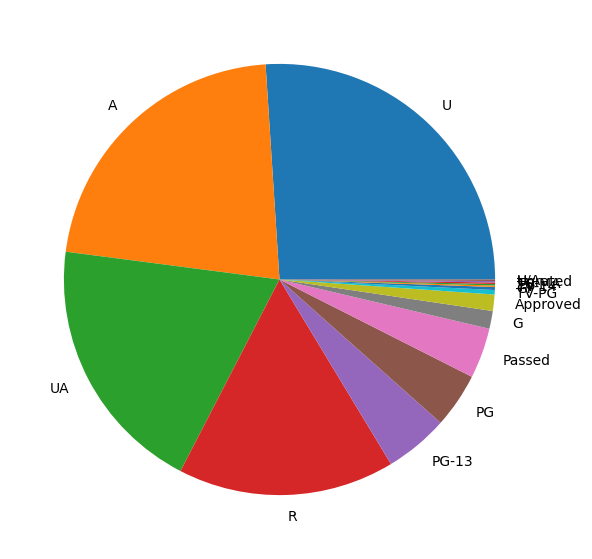

認證項目圓餅圖


In [13]:

import matplotlib.pyplot as plt
imdb_drop = pd.read_csv("imdb_drop.csv")
certificate_counts = imdb_drop["Certificate"].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(certificate_counts, labels=certificate_counts.index)
plt.title=("認證項目圓餅圖")
plt.show()
print(plt.title)




13.請篩選imdb_drop中「Certificate」為U的項目，且欄位保留「Certificate」及「Meta_Score」2個變數，另存成imdb_U資料集

In [14]:
imdb_drop = pd.read_csv("imdb_drop.csv")
imdb_U = imdb_drop.loc[imdb_drop["Certificate"] == "U", ["Certificate", "Meta_score"]]
imdb_U.to_csv("imdb_U.csv")
print(imdb_U)

    Certificate  Meta_score
4             U        96.0
5             U        94.0
10            U        92.0
20            U         NaN
23            U        96.0
..          ...         ...
984           U        74.0
986           U        64.0
988           U        90.0
992           U        65.0
994           U        96.0

[234 rows x 2 columns]


14.請繪製imdb_U中「Meta_Score」變數的莖葉圖

In [15]:
import sys
!{sys.executable} -m pip install stemgraphic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 484.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=1f6aab8b96aa24cb7fe173fe5f84b202e1440f6e43c02445d2ff98f9313f4ed0
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


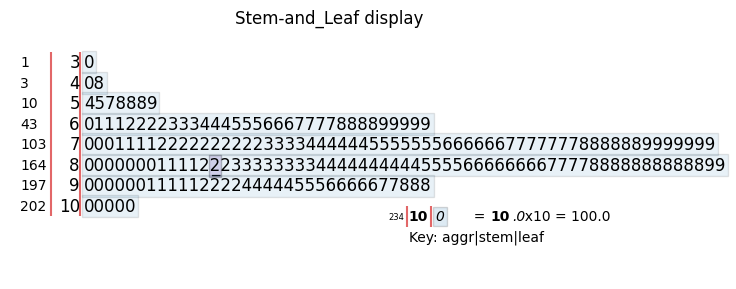

In [16]:
import stemgraphic
import matplotlib.pyplot as plt
import seaborn as sns
imdb_drop = pd.read_csv("imdb_U.csv")
fig, ax = stemgraphic.stem_graphic(imdb_drop["Meta_score"],scale=10,asc=False)
ax.set_title("Stem-and_Leaf display")
plt.show()

15.請繪製imdb_drop中「No_of_Votes」的盒鬚圖(以「評等」進行分組)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 35413 (\N{CJK UNIFIED IDEOGRAPH-8A55}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 31561 (\N{CJK UNIFIED IDEOGRAPH-7B49}) missing from current font.



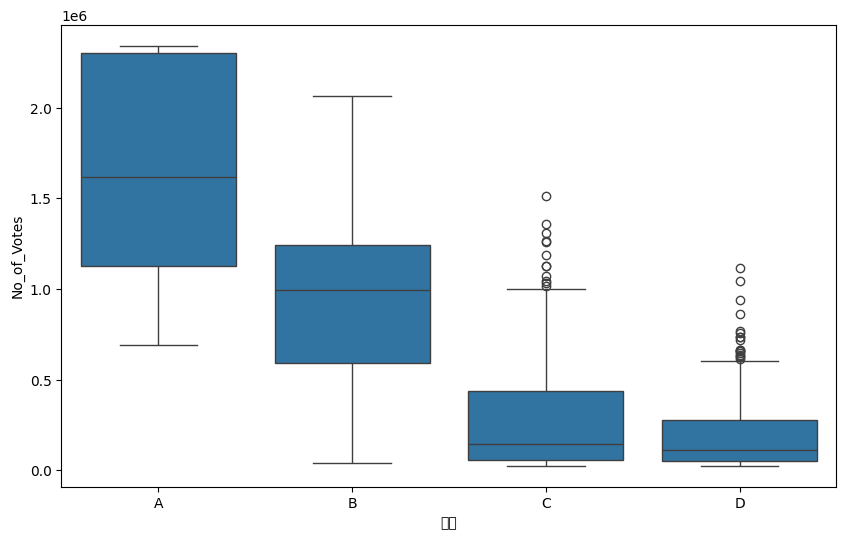

In [18]:
imdb_drop = pd.read_csv("imdb_drop.csv")
plt.figure(figsize=(10, 6))
sns.boxplot(x=imdb_drop['評等'], y=imdb_drop['No_of_Votes'])
plt.xlabel('評等')
plt.ylabel('No_of_Votes')
plt.show()

16.請分別讀入以下兩個檔案，並分別命名為Dat1及Dat2，再將這兩個檔案上下合併

In [19]:
df_Internet_1="https://mopsfin.twse.com.tw/opendata/t187ap46_O_1.csv"
Dat1 = pd.read_csv(df_Internet_1)
df_Internet_2="https://mopsfin.twse.com.tw/opendata/t187ap46_L_1.csv"
Dat2 = pd.read_csv(df_Internet_2)
merged_data = pd.concat([Dat1, Dat2], ignore_index=True)
print(merged_data)

      出表日期  報告年度  公司代號  公司名稱  範疇一排放量(噸CO2e)  範疇一資料邊界  範疇一取得驗證  範疇二排放量(噸CO2e)  \
0  1130326   NaN   NaN   NaN            NaN      NaN      NaN            NaN   
1  1130326   NaN   NaN   NaN            NaN      NaN      NaN            NaN   

   範疇二資料邊界  範疇二取得驗證  範疇三排放量(噸CO2e)  範疇三資料邊界  範疇三取得驗證  溫室氣體排放密集度(噸CO2e/單位)  \
0      NaN      NaN            NaN      NaN      NaN                  NaN   
1      NaN      NaN            NaN      NaN      NaN                  NaN   

   溫室氣體排放密集度單位  溫室氣體管理之策略、方法、目標  
0          NaN              NaN  
1          NaN              NaN  
